In [44]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pl

In [45]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Galax\Downloads\daily_category_patients_unique.csv', parse_dates=['Day'])
df = df.sort_values('Day')
print(df.head())

         Day  Blood & Immune  Congenital  Diabetes  Digestive  \
0 2019-01-01               0           0         0          1   
1 2019-01-02               0           0         0          2   
2 2019-01-03               0           0         0          4   
3 2019-01-04               2           0         2          6   
4 2019-01-05               0           1         1          1   

   Encounters & Health Services  Endocrine/Metabolic (other)  Eye & Ear  \
0                             2                            0          0   
1                             2                            1          0   
2                             5                            1          0   
3                             1                            1          0   
4                             1                            0          0   

   Genitourinary  Heart / Circulatory  ...  Neoplasms  Neurologic  Other  \
0              0                    5  ...          0           1      0   
1     

In [46]:
lag_days = 1  # use previous day's counts as features
category_cols = df.columns[1:-1]  # all diagnosis columns (exclude Day & Total Patients)

for col in category_cols:
    df[f'{col}_lag1'] = df[col].shift(lag_days)

# Add temporal features
df['day_of_week'] = df['Day'].dt.dayofweek
df['month'] = df['Day'].dt.month

# Drop first row (NaN due to lag)
df_features = df.dropna().reset_index(drop=True)

In [47]:
feature_cols = [c for c in df_features.columns if '_lag' in c] + ['day_of_week', 'month']
X = df_features[feature_cols]
y = df_features[category_cols]  # predict counts for each category

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [49]:
xgb = MultiOutputRegressor(XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
))

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


In [50]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.08841609954834


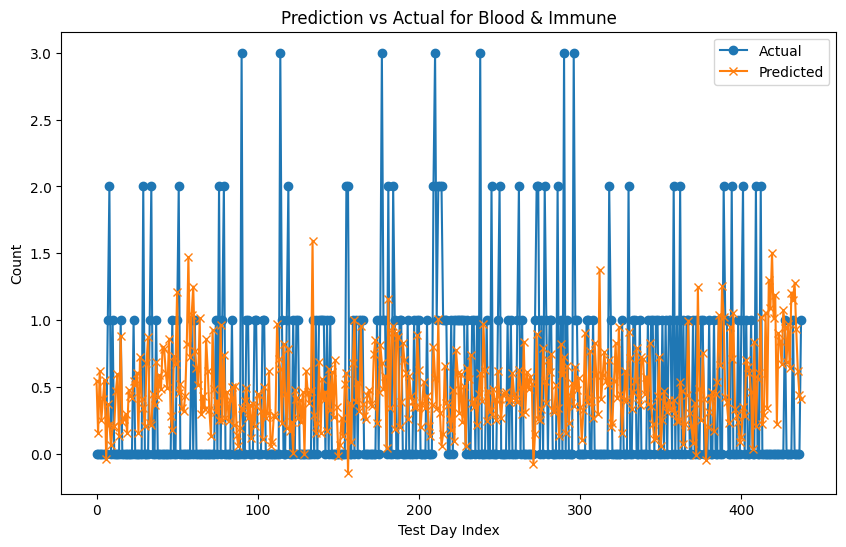

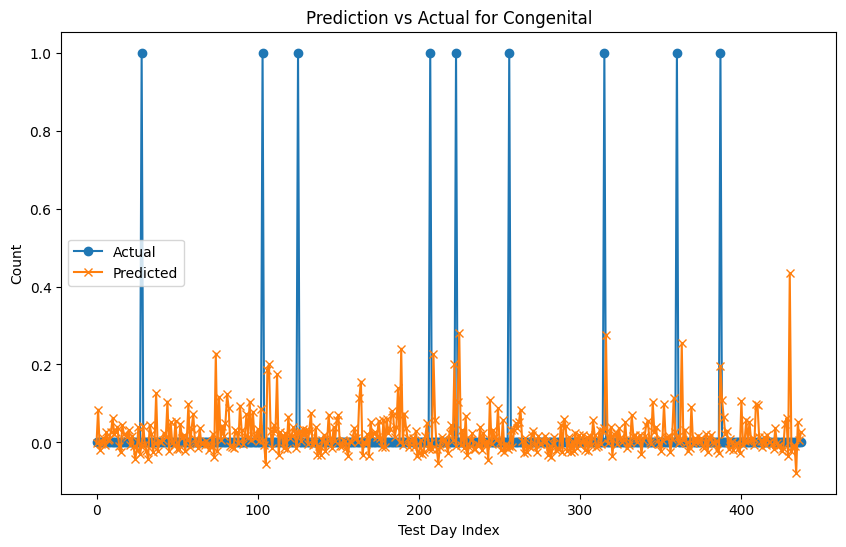

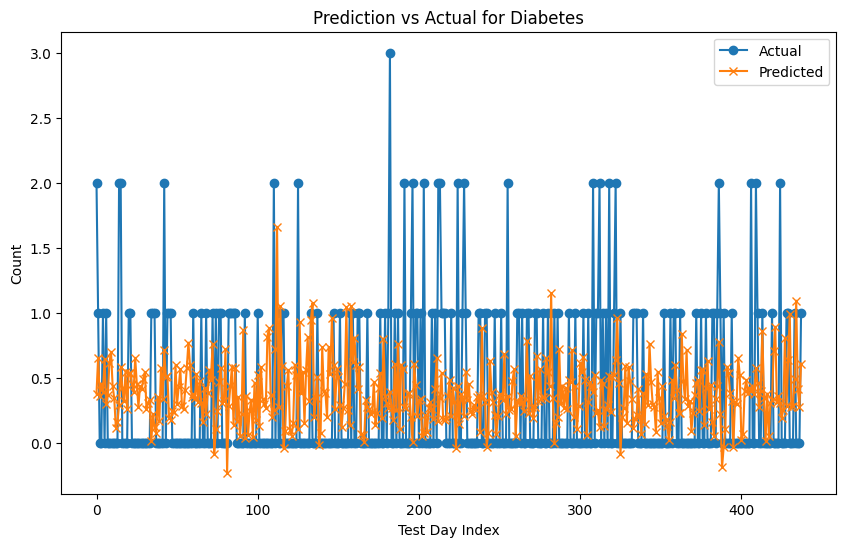

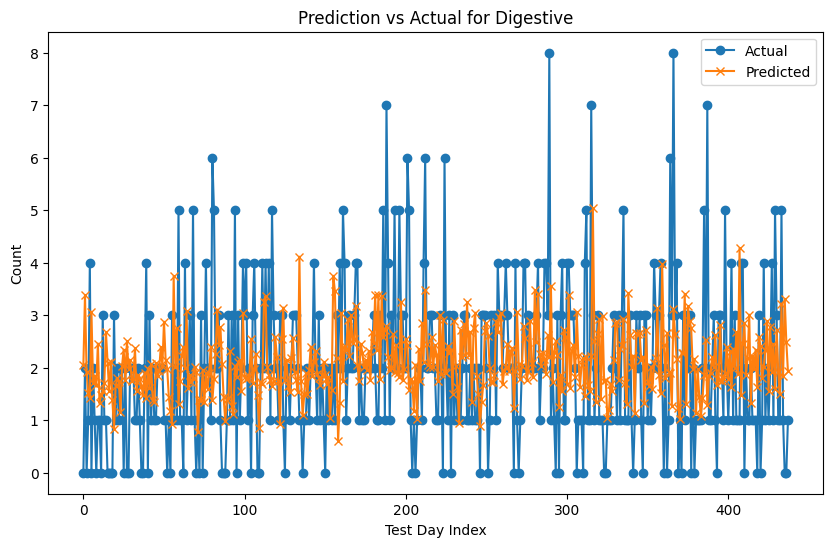

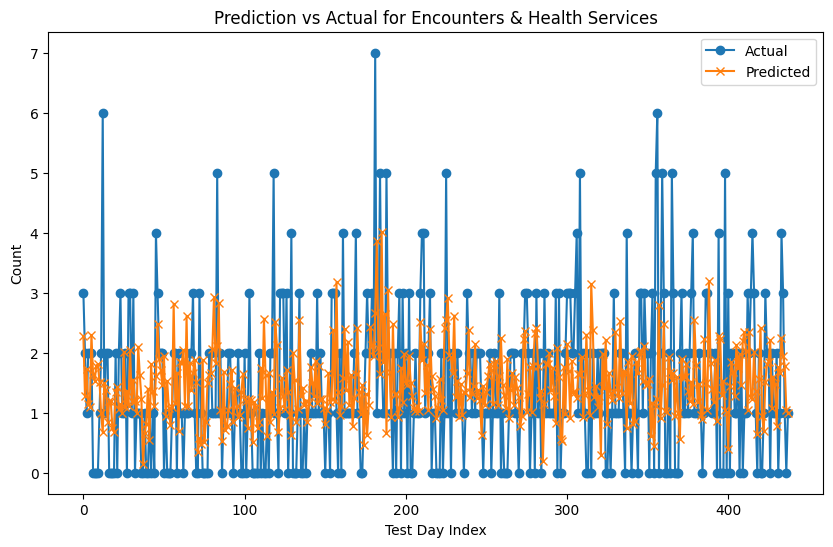

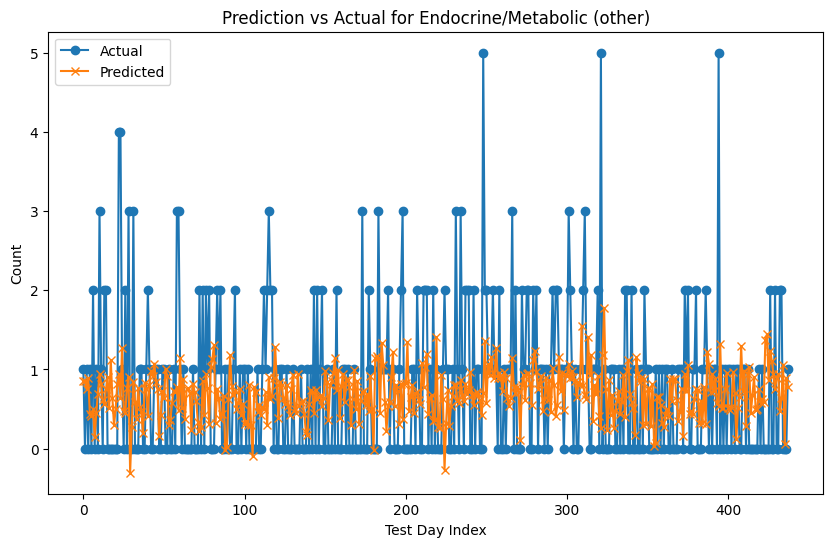

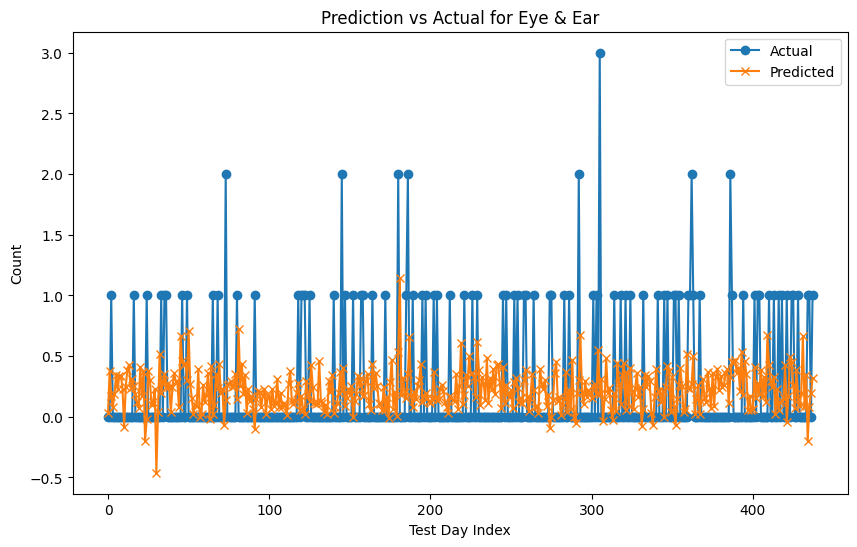

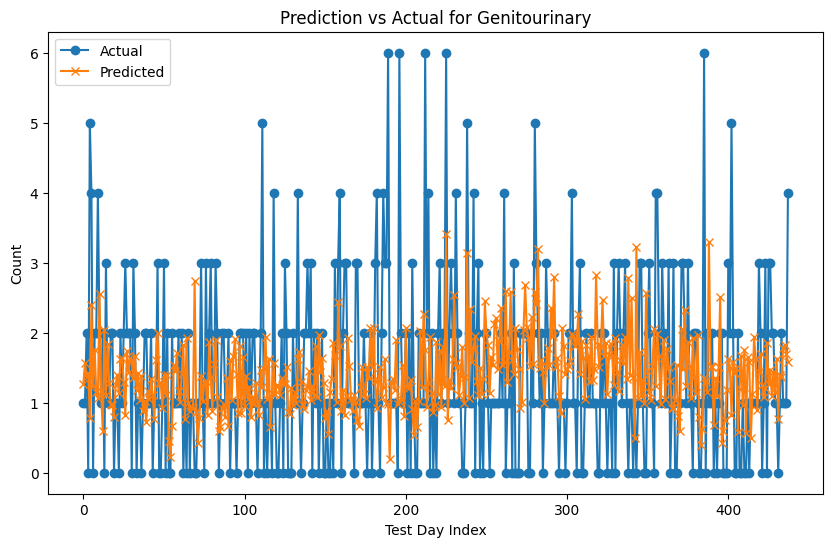

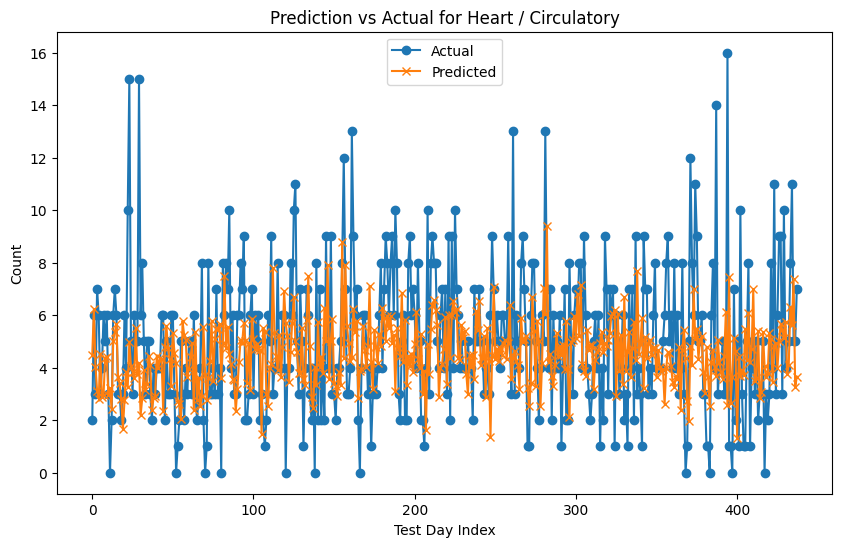

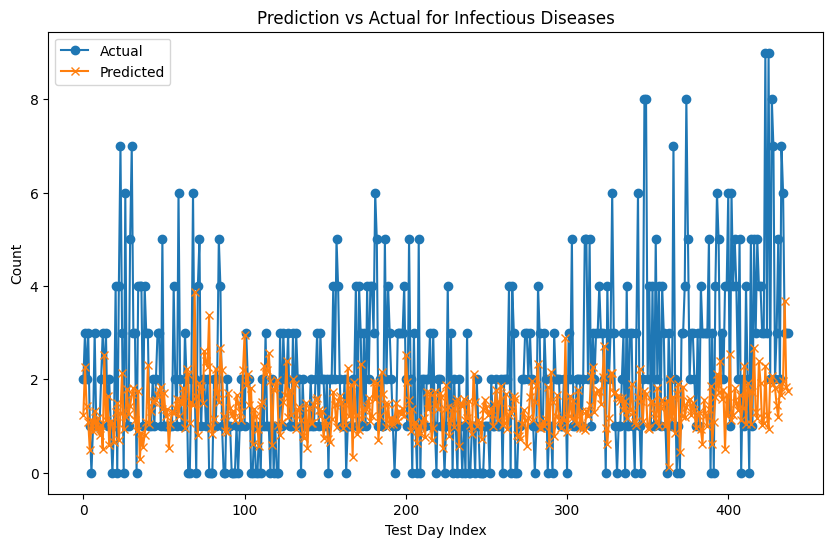

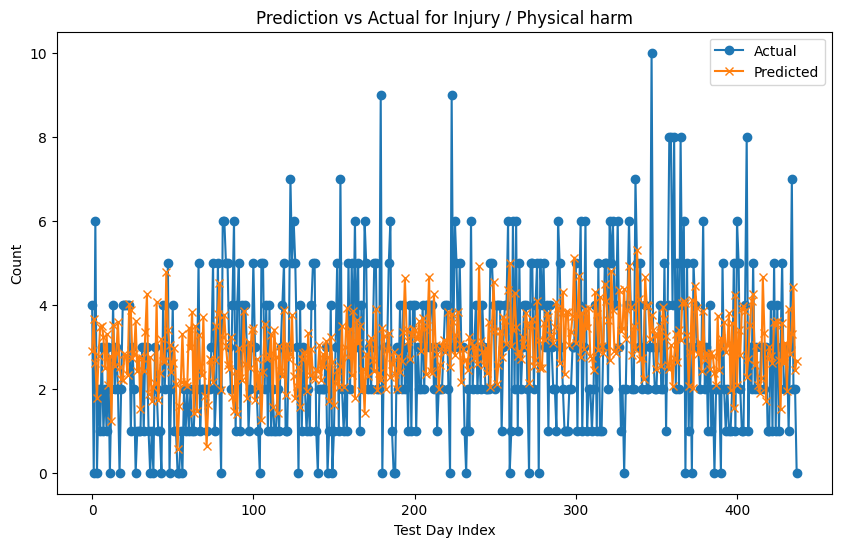

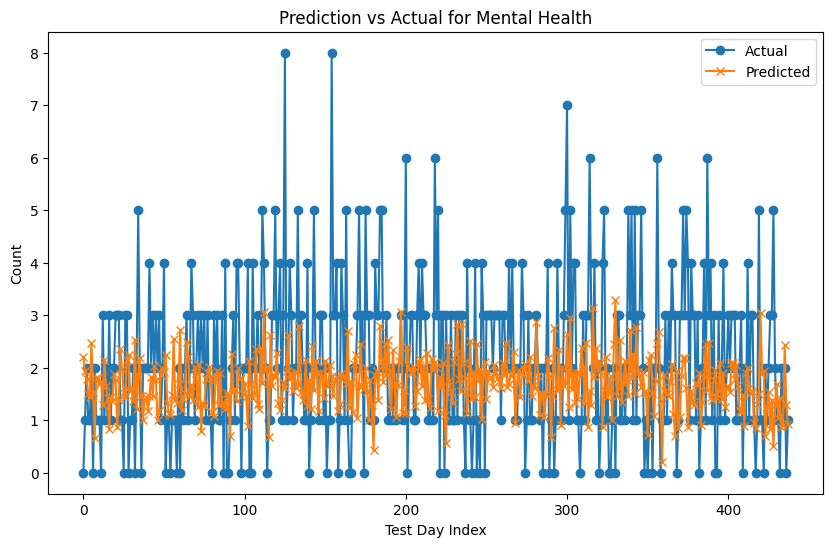

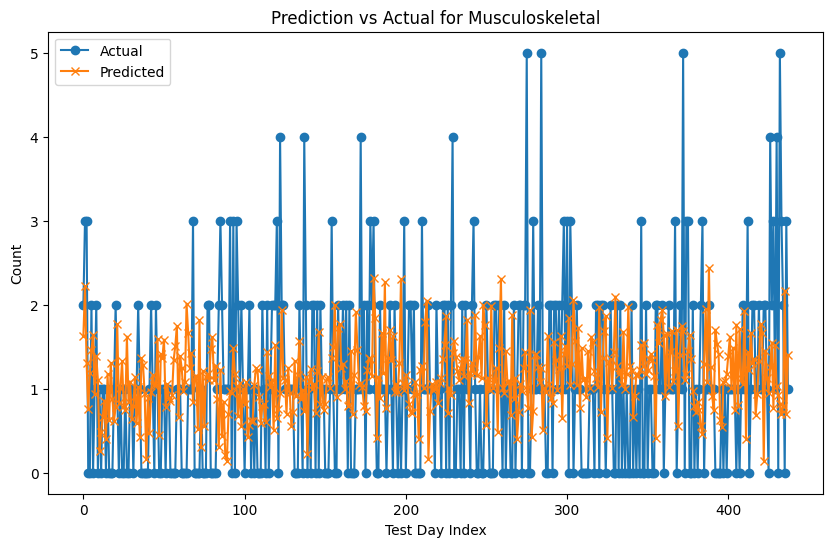

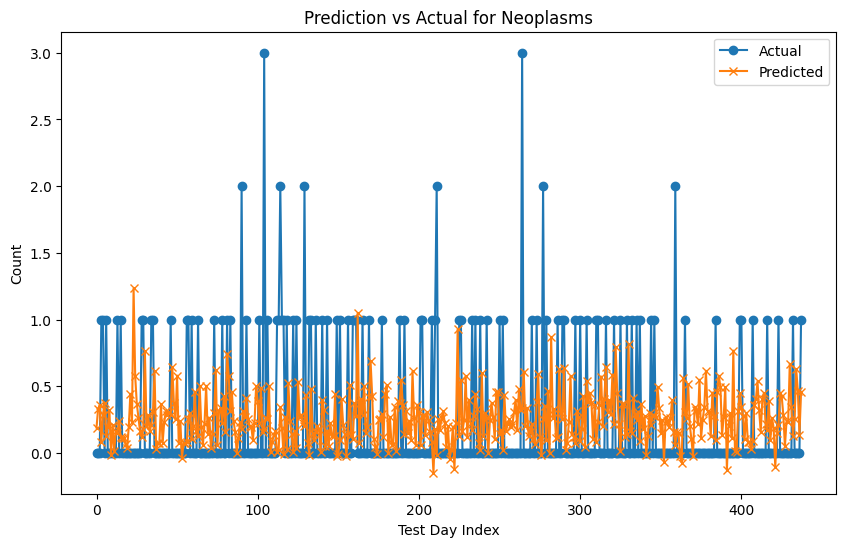

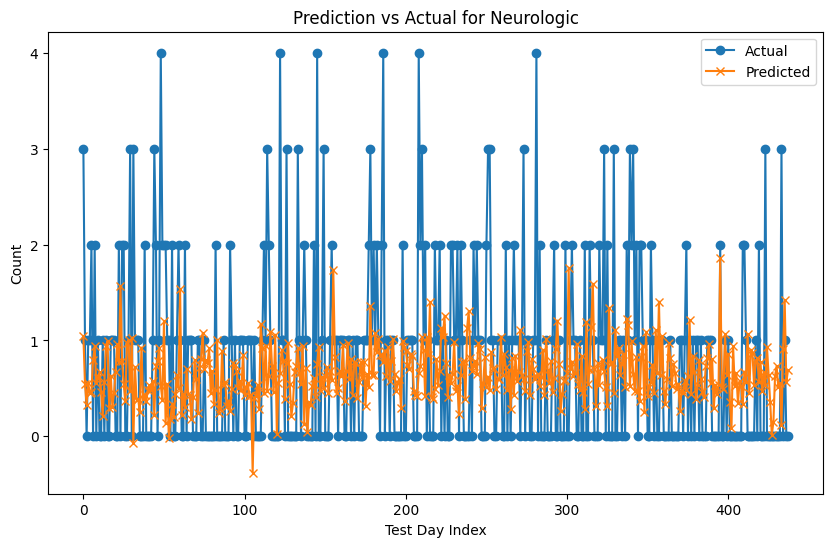

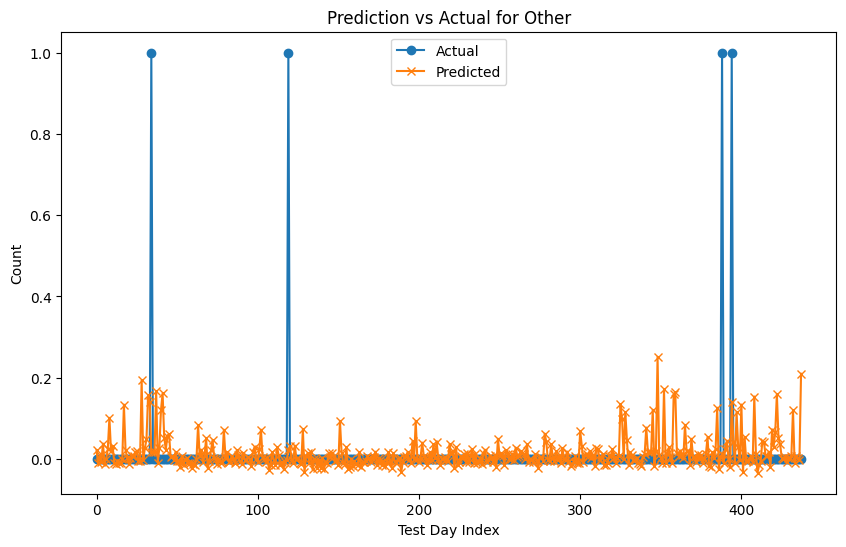

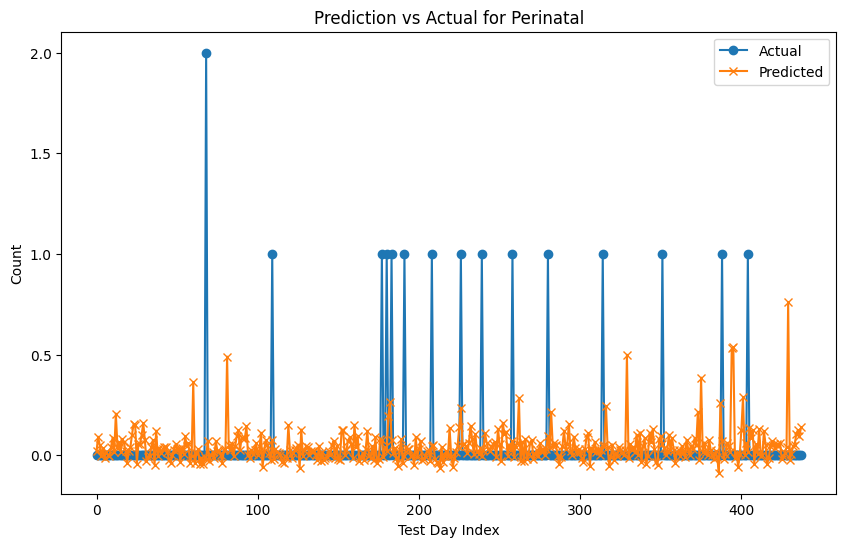

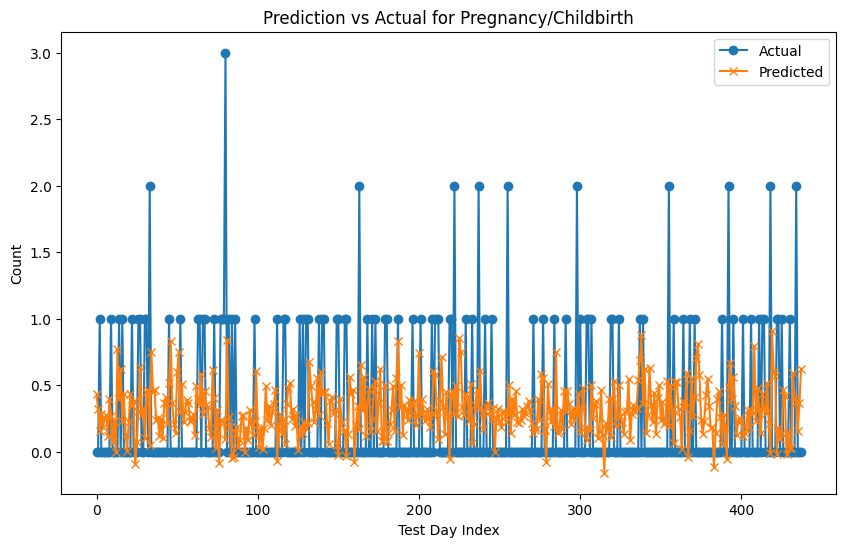

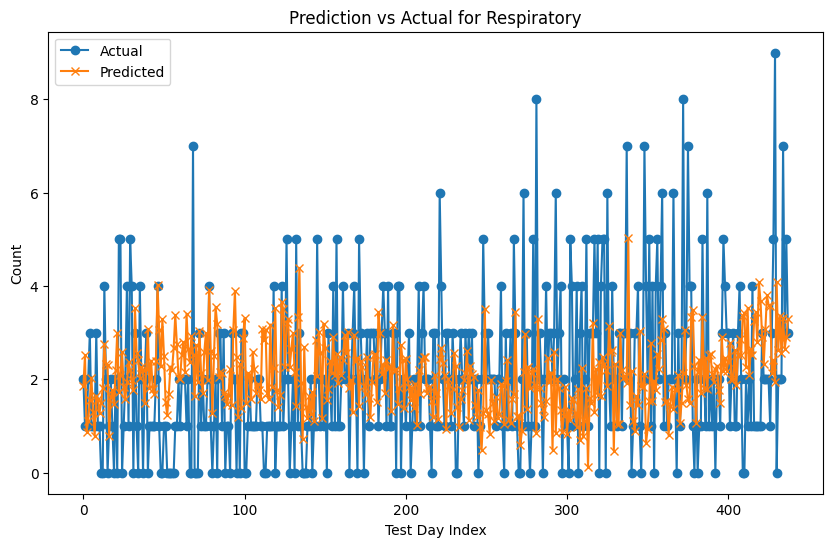

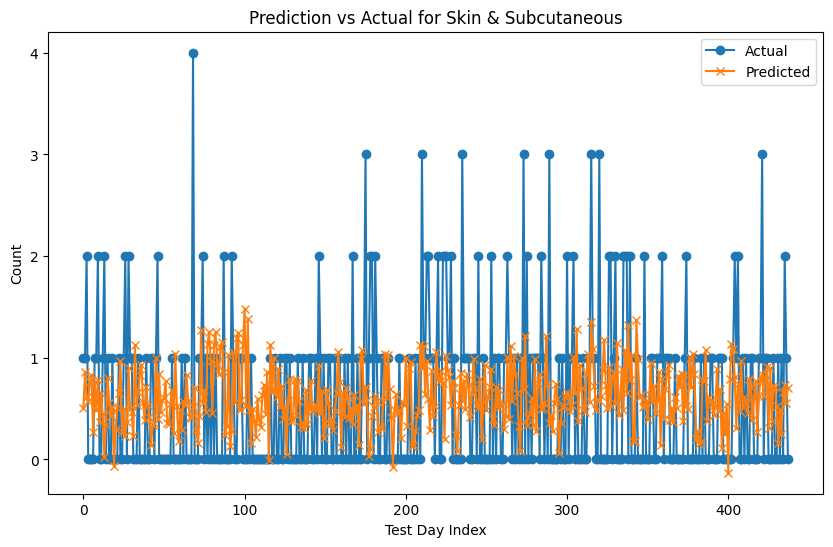

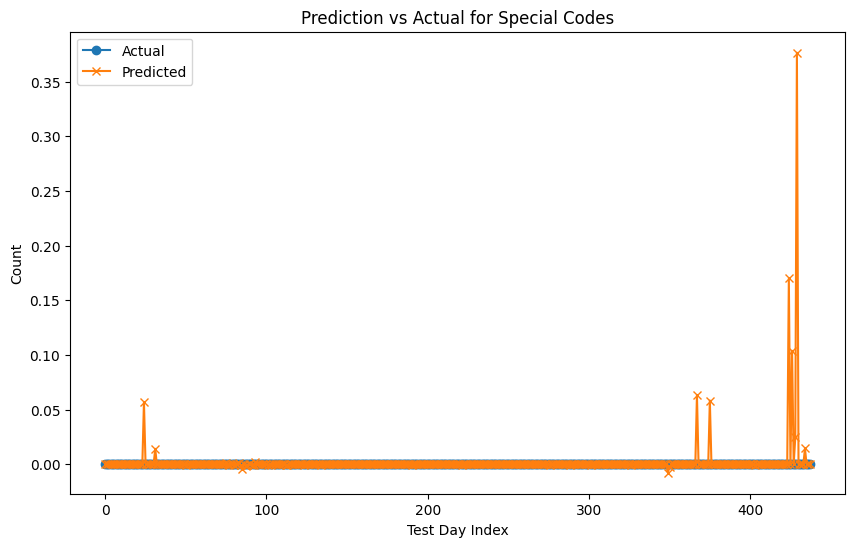

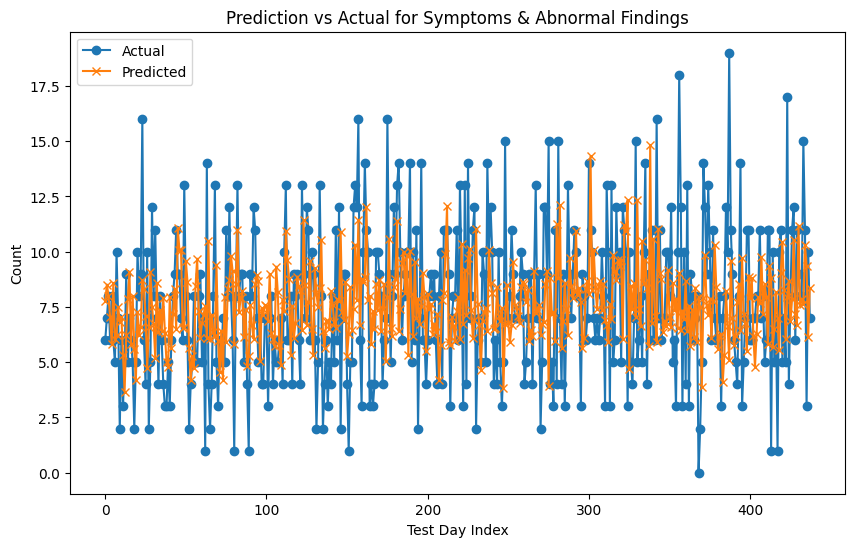

In [51]:
for i, col in enumerate(category_cols):
    plt.figure(figsize=(10,6))
    plt.plot(y_test[col].values, label='Actual', marker='o')
    plt.plot(y_pred[:, i], label='Predicted', marker='x')
    plt.title(f"Prediction vs Actual for {col}")
    plt.xlabel("Test Day Index")
    plt.ylabel("Count")
    plt.legend()
    plt.show()